# 1. Import Libraries 

In [279]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
#to remove future warnings
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# 2. Meet and Greet the Data

In [280]:
#Read the Dataset
concrete_df=pd.read_csv('/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv')

In [281]:
#Check the first five records 
concrete_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation

1. It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
2. All the records are numeric.

In [282]:
#Check the last few records 
concrete_df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [283]:
concrete_df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [284]:
#renaming columns
concrete_df = concrete_df.rename(columns={'cement':"cement",
       'blast_furnace_slag':"slag",
       'fly_ash':"ash",
       'water':"water",
       'fine_aggregate ':"fineagg",
       'superplasticizer':"superplastic",
       'coarse_aggregate':"coarseagg",
       'age':"age",
       'concrete_compressive_strength':"strength"})

In [285]:
#Info of the dataset
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.


In [286]:
# Data type of the columns 
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

It gives the data types of each column of the dataset.


In [287]:
#To get the shape 
concrete_df.shape

(1030, 9)

It gives the details of the number of rows and columns present in the dataset.There are 1030 rows and 9 columns.


In [288]:
#To get the columns name
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

It gives the column names of the dataset.


In [289]:
# Five point summary
concrete_df.describe().T


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1. It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
2. We can see that cement,slag,ash are left skewed

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis  

### Description of indepedant variables

### Cement

In [290]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())


Range of values:  438.0


In [291]:
#Central values 
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.16786407766995
Median value:  272.9
Standard deviation:  104.50636449481532


In [292]:
#Quartiles

Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [293]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [294]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0 %
% of Outlier in cement lower:  0 %


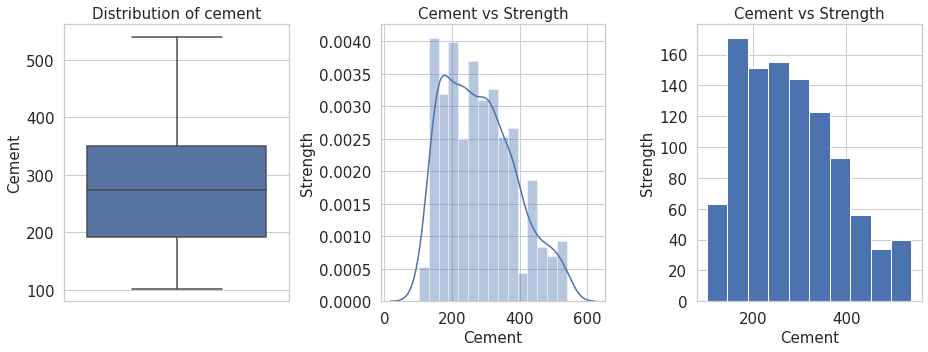

In [295]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Slag

In [296]:
#Range of values 
print('Range of values: ', concrete_df['slag'].max()-concrete_df['slag'].min())


Range of values:  359.4


In [297]:
#Central values

print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271846
Median value:  22.0
Standard deviation:  86.27934174810584
Null values:  False


In [298]:
#Quartiles

Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [299]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [300]:
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0 %
% of Outlier in slag lower:  0 %


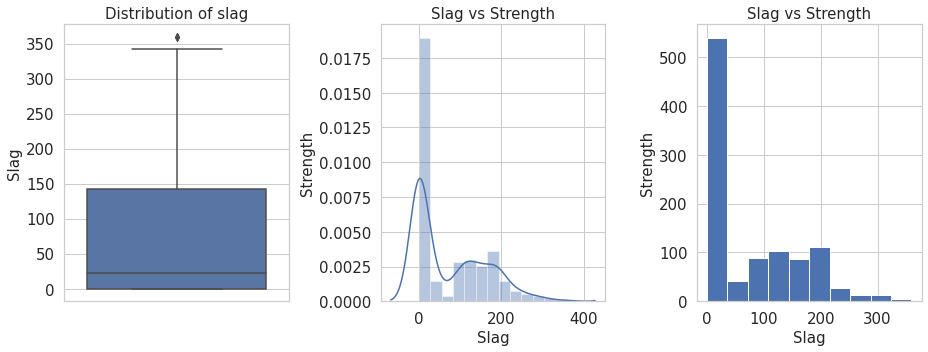

In [301]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Ash

In [302]:
#Range of values observed

print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())


Range of values:  200.1


In [303]:
#Central values

print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.18834951456311
Median value:  0.0
Standard deviation:  63.99700415268765


In [304]:
#Quartiles 

Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [305]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [306]:
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0 %
% of Outlier in ash lower:  0 %


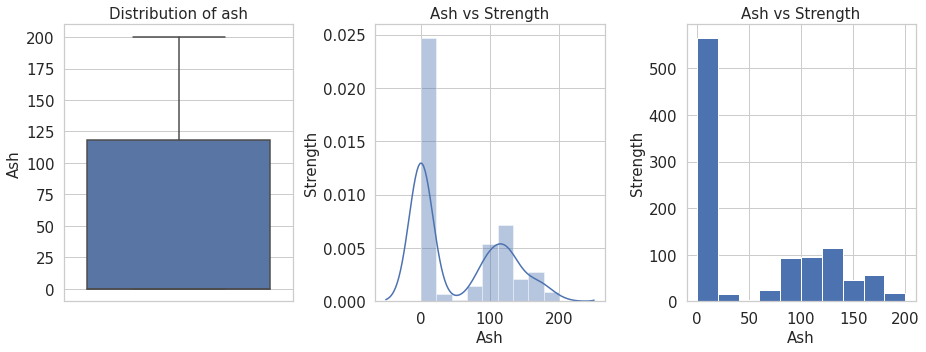

In [307]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Water

In [308]:
#Range of values observed

print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())


Range of values:  125.2


In [309]:
#Central values
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339806
Median value:  185.0
Standard deviation:  21.35421856503247
Null values:  False


In [310]:
#Quartiles
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [311]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [312]:
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0 %
% of Outlier in water lower:  0 %


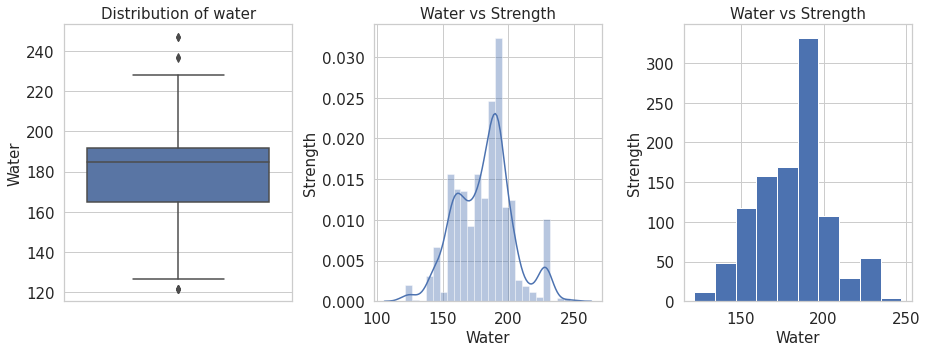

In [313]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Superplastic

In [314]:
#Range of values observed

print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())


Range of values:  32.2


In [315]:
#Central values

print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174758
Median value:  6.4
Standard deviation:  5.97384139248552
Null values:  False


In [316]:
#Quartiles

Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [317]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [318]:
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1 %
% of Outlier in superplastic lower:  0 %


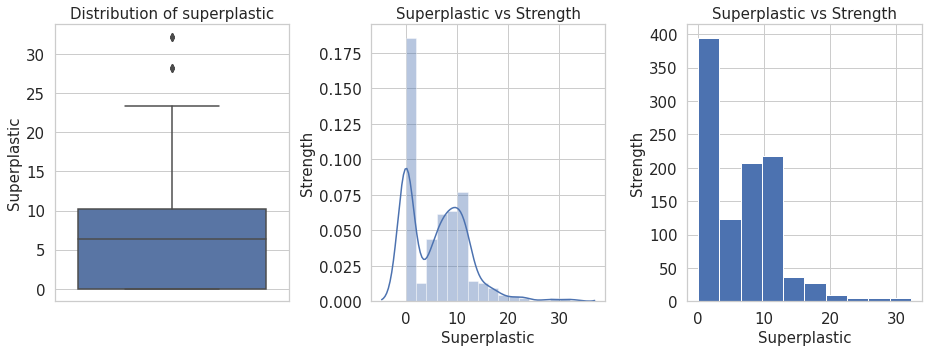

In [319]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Coarseagg

In [320]:
#Range of values observed

print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())


Range of values:  344.0


In [321]:
#Central values

print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.9189320388349
Median value:  968.0
Standard deviation:  77.75395396672077
Null values:  False


In [322]:
#Quartiles

Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [323]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [324]:
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0 %
% of Outlier in coarseagg lower:  0 %


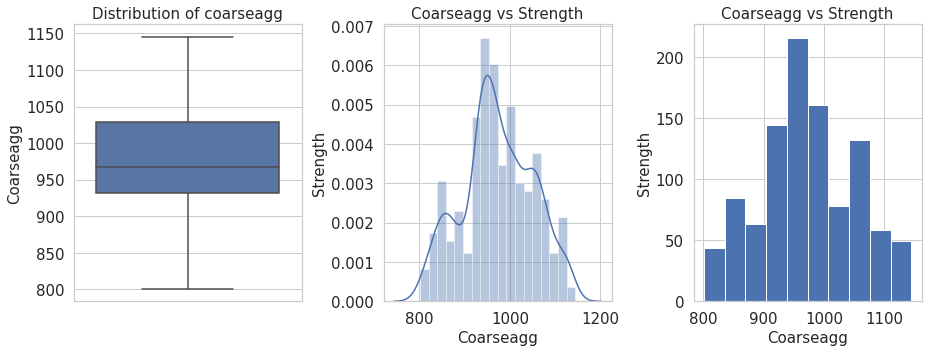

In [325]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Fineagg

In [326]:
#Range of values observed
print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())


Range of values:  398.6


In [327]:
#Central Values 

print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240437
Null values:  False


In [328]:
#Quartiles

Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.95
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.04999999999995


In [329]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3750000000001
Upper outliers in fineagg:  963.5749999999999


In [330]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0 %
% of Outlier in fineagg lower:  0 %


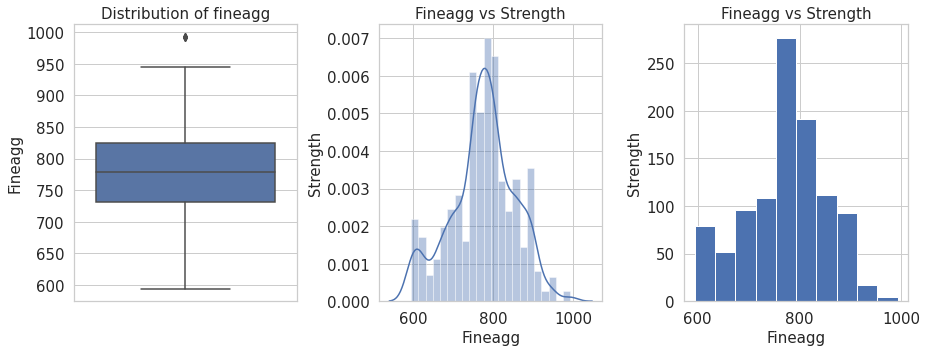

In [331]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Age

In [332]:
#Range of values observed

print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())


Range of values:  364


In [333]:
#Central values

print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103249
Null values:  False


In [334]:
#Quartiles

Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [335]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [336]:
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6 %
% of Outlier in age lower:  0 %


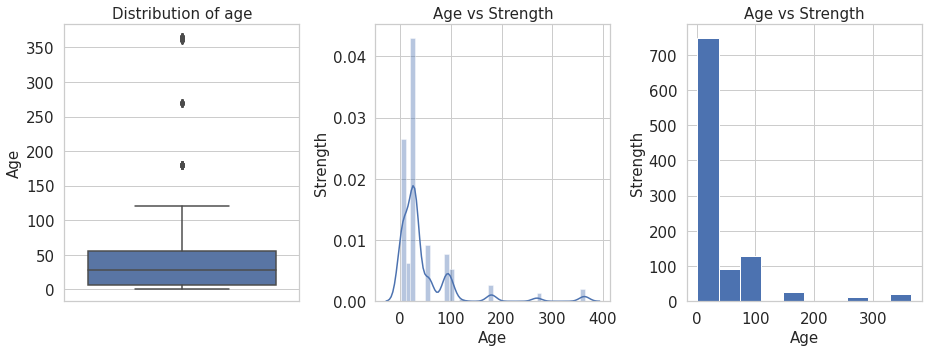

In [337]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## 3.2 MultiVariate Analysis

<AxesSubplot:xlabel='strength'>

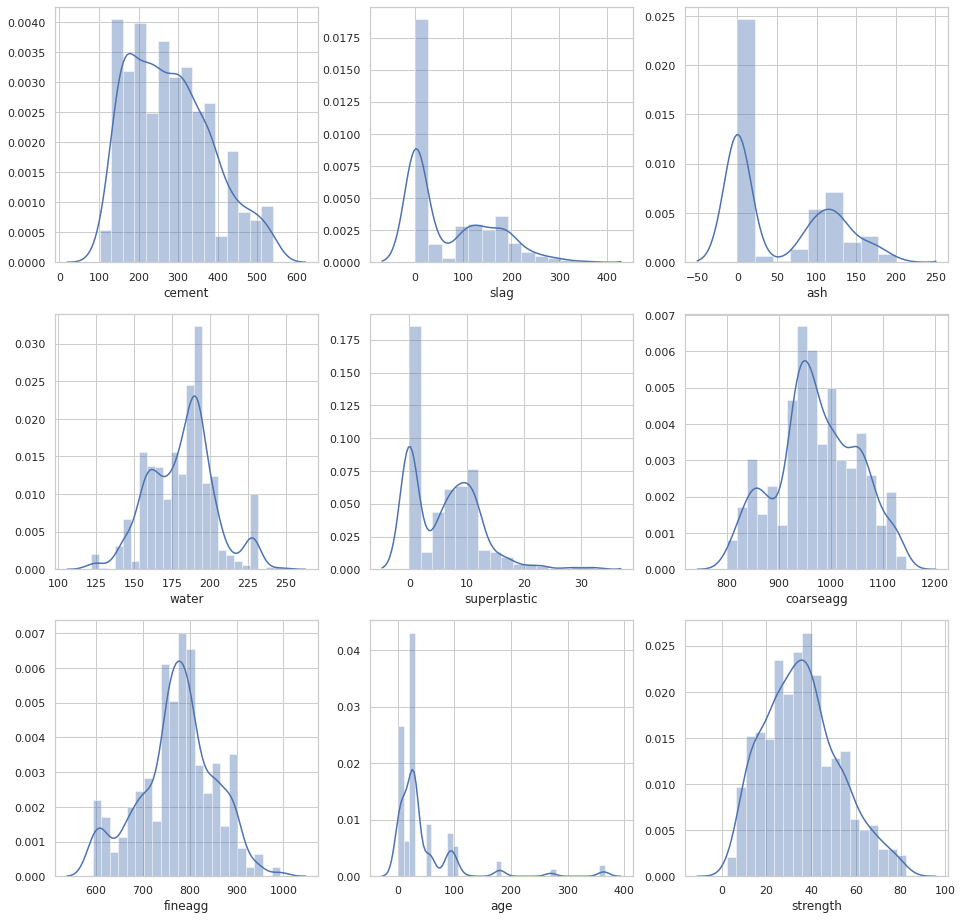

In [338]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2])

**Observation**

We can see observe that :

1. cement is almost normal.
2. slag has three gausssians and rightly skewed.
3. ash has two gaussians and rightly skewed.
4. water has three guassians and slighly left skewed.
5. superplastic has two gaussians and rightly skewed.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed.

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

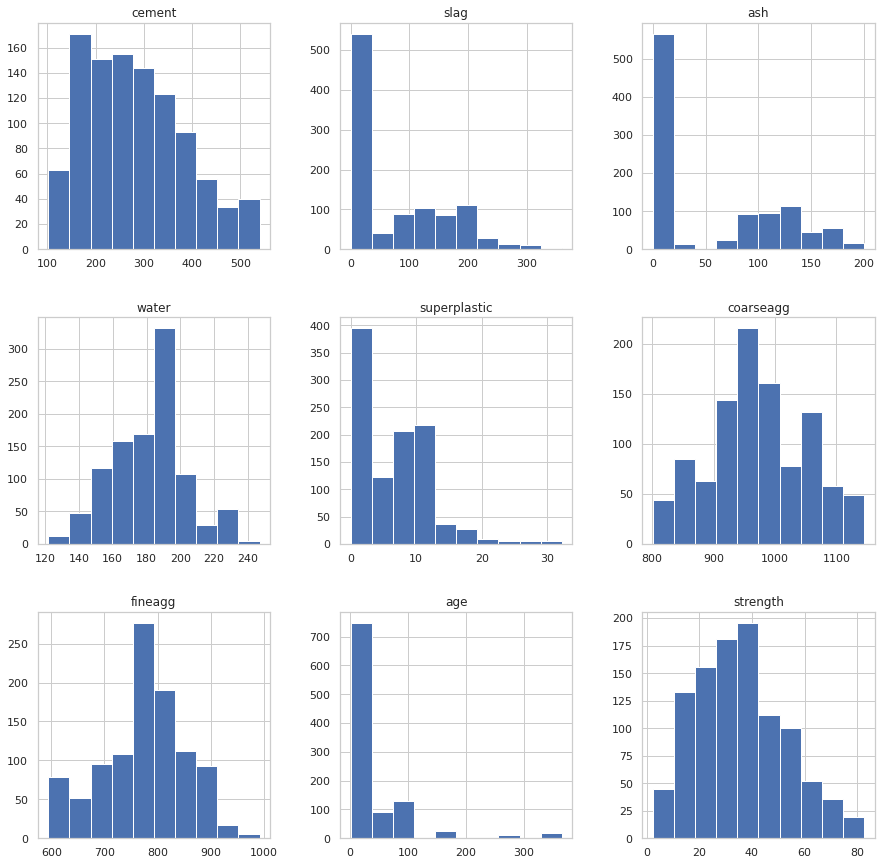

In [339]:
# Histogram
concrete_df.hist(figsize=(15,15))

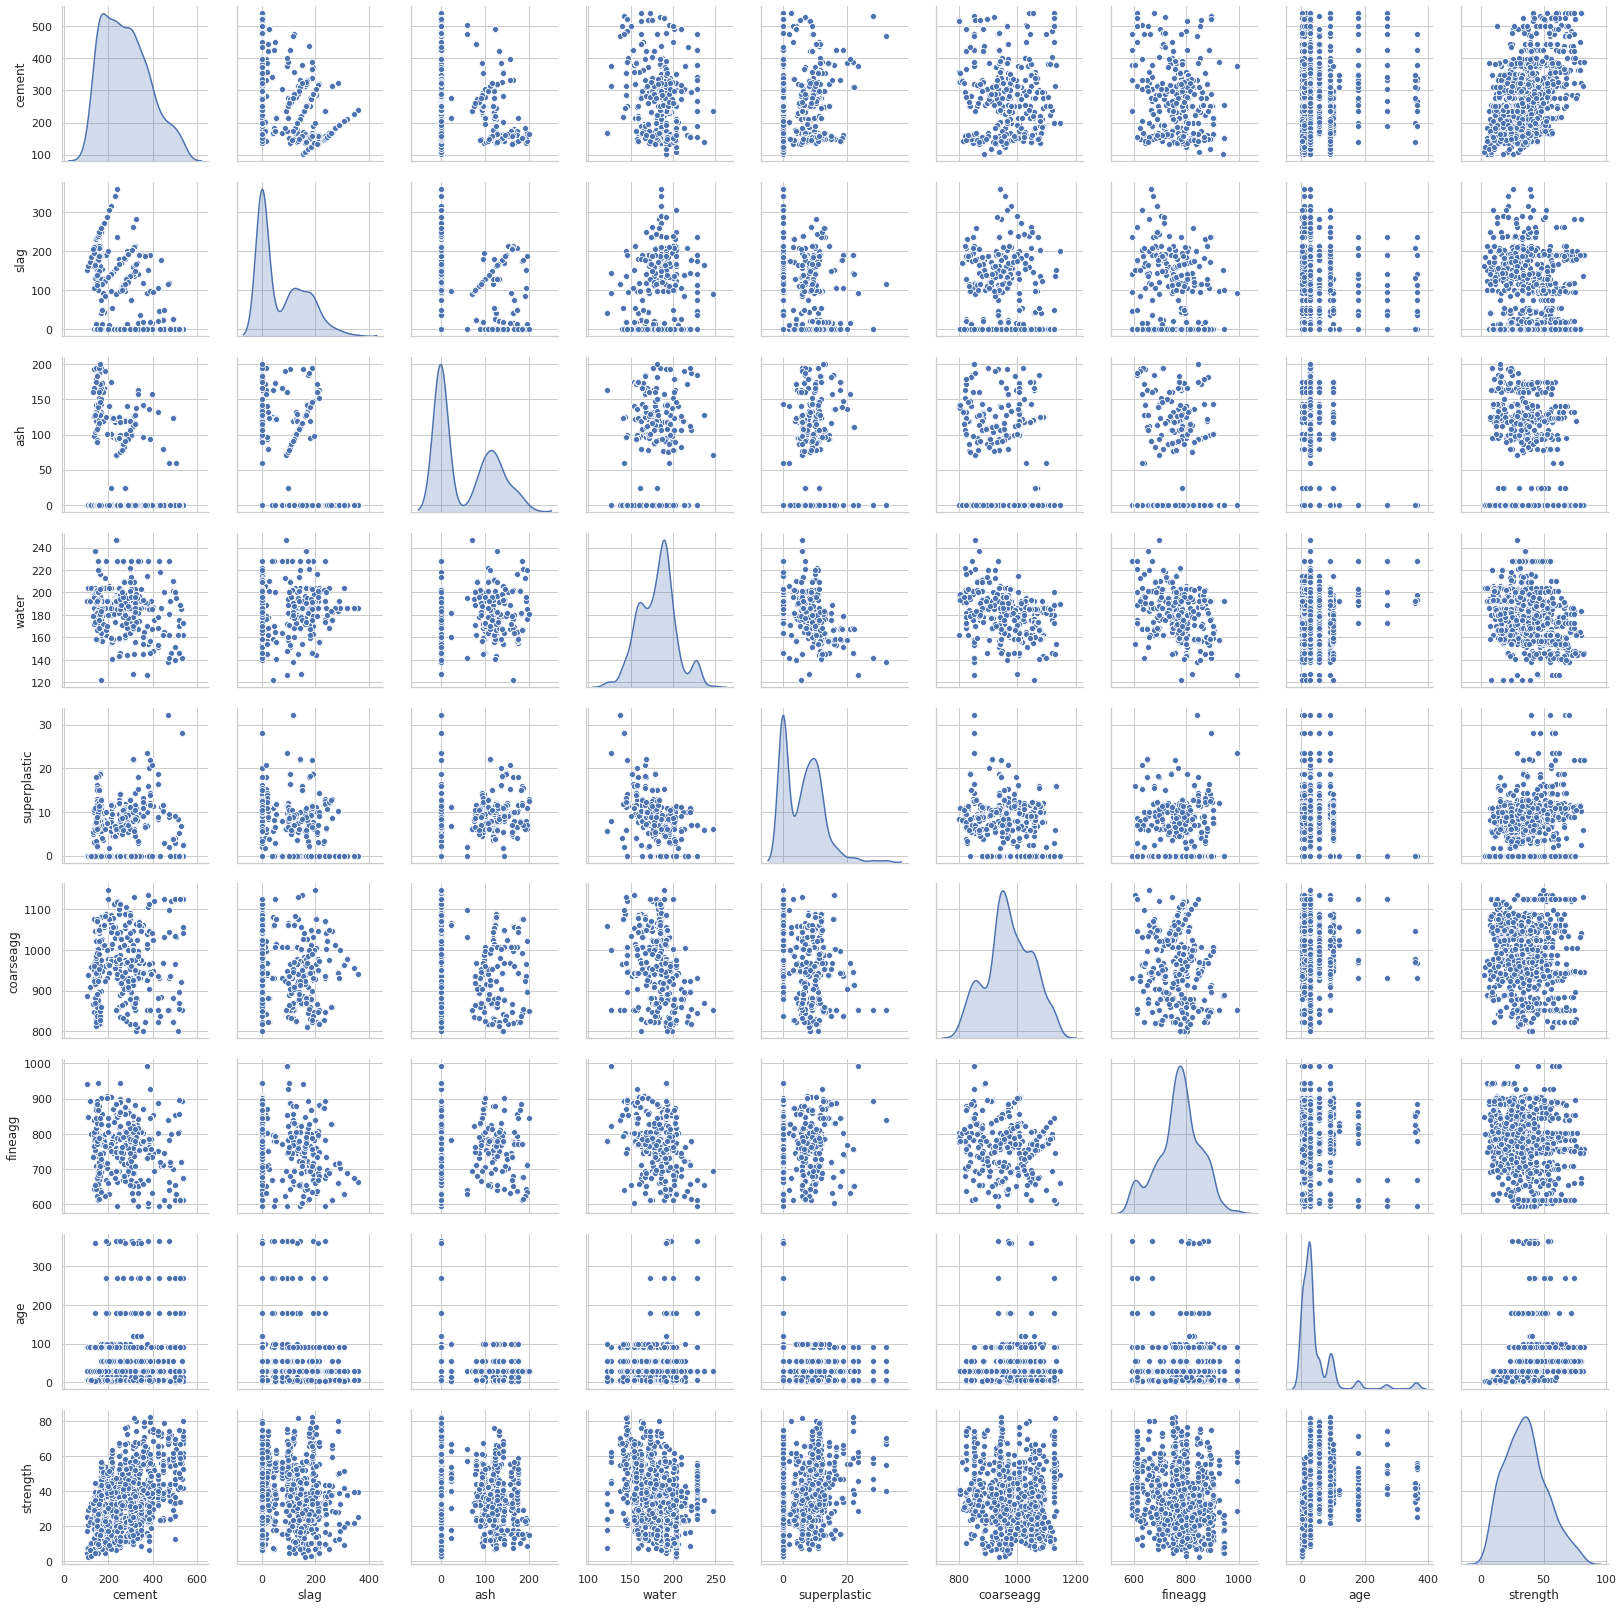

In [340]:
## pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(concrete_df, diag_kind='kde')

**Diagonals Analysis**
The diagonal gives the same information, we got using distplot.

1. cement attribute have almost normal curve.
2. slag has two gausssians and rightly skewed.It shows the presence of outlies.
3. ash has two gaussians and rightly skewed.It shows the presence of outlies.
4. water has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed. It shows the presence of outlies.
9. strength is close to a normal curve.
10. We not only have missing values problem but also outliers problem in the dataset.

**Off Diagonal Analysis: Relationship between indpendent attributes**

Scatter plots

1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
5. superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.


The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

strength attribute : Relationship between dependent and independent attributes

strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
strength vs slag: There is no particular trend.
strength vs slag: There is also no particular trend.
strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
Other attributes does not give any strong relationship with strength.
Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [341]:
# corrlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Here, we can see the correlation value between the attributes.


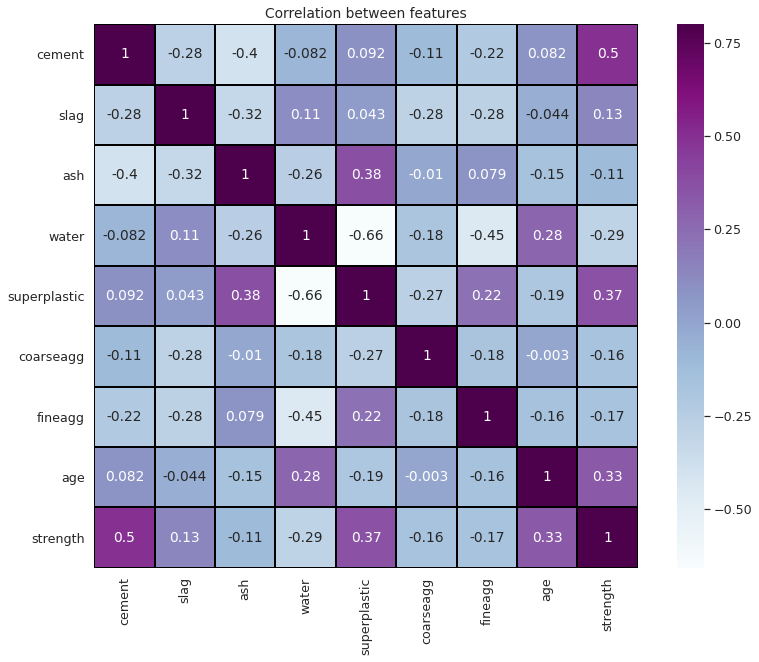

In [342]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

1. It is also giving the same information we observed in pairplot analysis.
2. water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

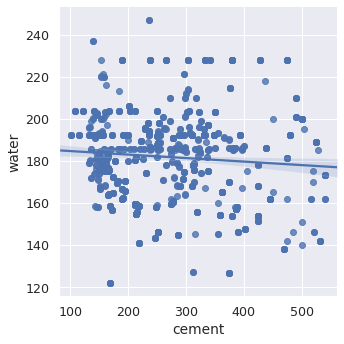

In [343]:
# water vs cement
sns.lmplot(x="cement",y="water",data=concrete_df)
plt.show()

## 3.3 Handling missing values and Outliers

In [344]:
#Check for the missing values 
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:>

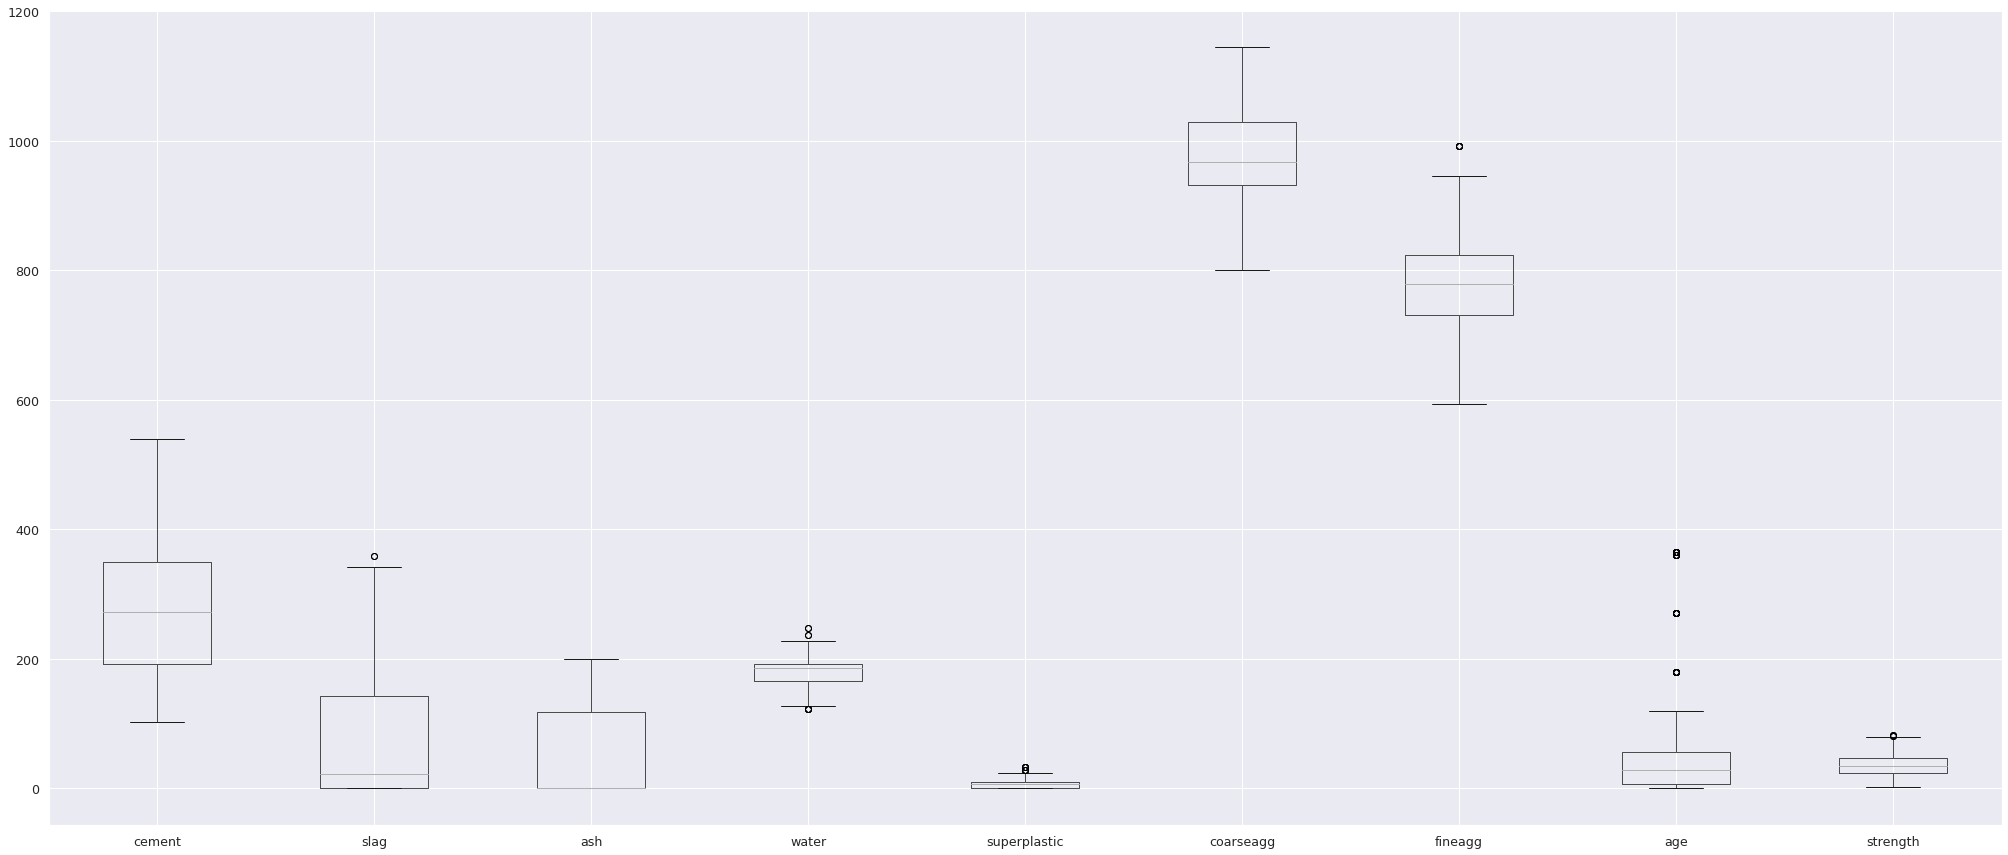

In [345]:
#Checking for outliers
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))


It also shows that slag, ash, water superplastic, and age contains outliers.


In [346]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


1. Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
2. We can see that slag, water, superplastic and age contain outliers.

In [347]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 553    359.4
559    359.4
571    342.1
584    342.1
Name: slag, dtype: float64


In [348]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])


Records containing outliers in water: 
 873    247.0
936    246.9
Name: water, dtype: float64


In [349]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 76     32.2
79     28.2
99     32.2
102    28.2
122    32.2
125    28.2
145    32.2
148    28.2
168    32.2
171    28.2
Name: superplastic, dtype: float64


In [350]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])


Records containing outliers in age: 
 2      270
3      365
4      360
6      365
12     270
17     365
24     365
25     270
26     270
30     365
31     365
33     270
34     365
35     270
41     365
42     365
56     365
60     270
61     270
63     270
65     270
66     360
604    365
610    365
616    360
620    365
622    365
756    270
769    360
792    360
798    270
814    360
820    270
Name: age, dtype: int64


In [351]:
#Handling the outliers
#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

<AxesSubplot:>

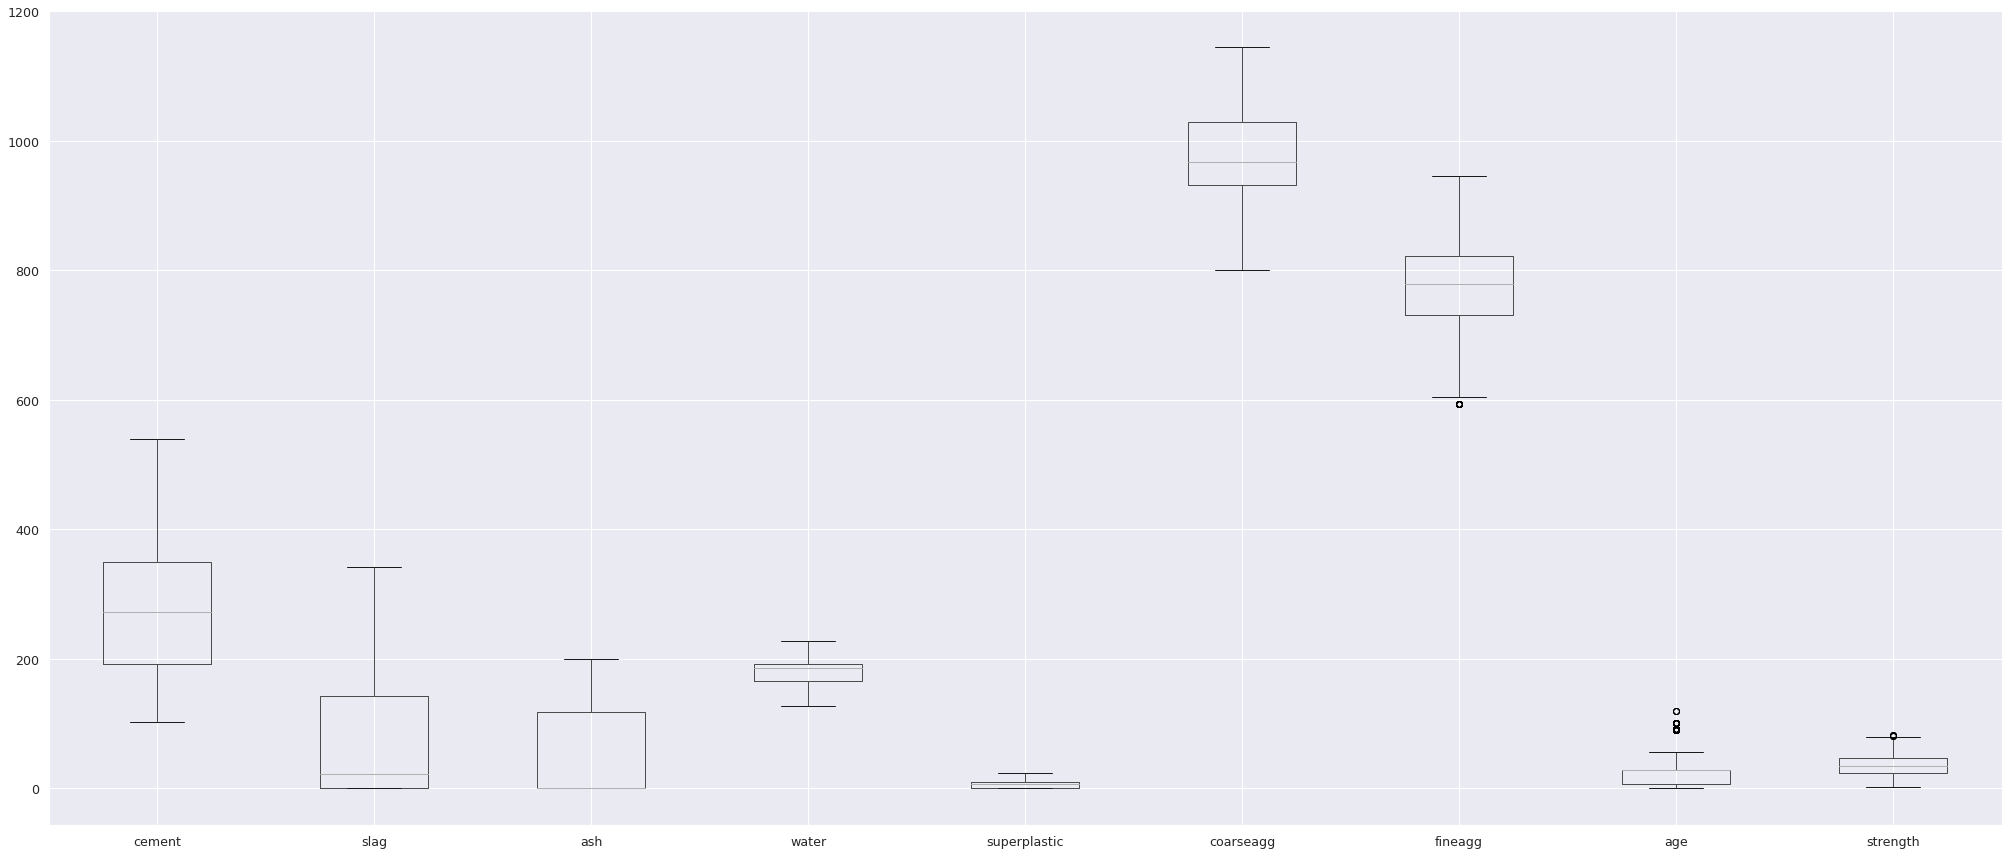

In [352]:
concrete_df1.boxplot(figsize=(35,15))


# 4. Feature Engineering, Model Building and Model Tuning

Model selection in machine learning refers to the process of choosing the best model from a set of candidate models for a given problem. This is an important step in the machine learning process as the choice of model can have a significant impact on the performance of the system. Model selection involves comparing different models based on certain criteria, such as accuracy, computational complexity, and interpretability, to find the one that best fits the problem at hand.

The choice of model depends on several factors, including the type of data, the nature of the problem, and the desired level of accuracy. Some common models used in machine learning include linear regression, k-nearest neighbors, decision trees, random forests, and neural networks.

The model selection process often involves tuning the parameters of each model to find the best combination that yields the highest performance. This is known as hyperparameter tuning and can be done using techniques such as grid search, random search, and Bayesian optimization.

In summary, model selection is a crucial step in the machine learning process and requires careful consideration of the problem, data, and desired outcome to ensure that the best model is chosen.


In [353]:
#Scaling the features

concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.


In [354]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [355]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)


# DecisionTree Regression


In [356]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [357]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.310193
slag          0.059369
ash           0.008360
water         0.122039
superplastic  0.049740
coarseagg     0.026575
fineagg       0.050722
age           0.373002


1. So, cement, age and water are significant attributes.
2. Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [358]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9930841416603411
Performance on testing data using DT: 0.75307804802764
Accuracy DT:  0.75307804802764
MSE:  0.2321287661078383


**There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.**


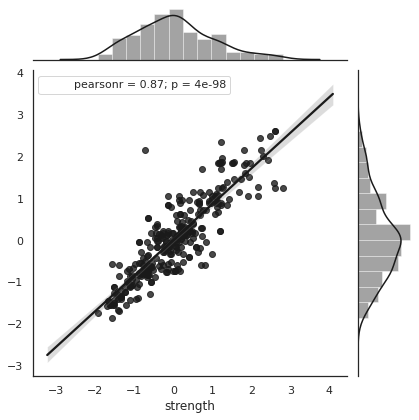

In [359]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [360]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078


## K fold cross validation


In [361]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8486846680887509
Standard Deviation:  0.05509450923110203


In [362]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685


### Iteration 2


**Drop the least significant variable**


In [363]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [364]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()


In [365]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [366]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [367]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.352149
slag          0.073271
water         0.140377
superplastic  0.057068
age           0.377135


In [368]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9911889880235539
Performance on testing data using DT: 0.7999043731174629
Accuracy DT:  0.7999043731174629


**The acuracy on testing dataset is not improved, still it is an overfit model.**


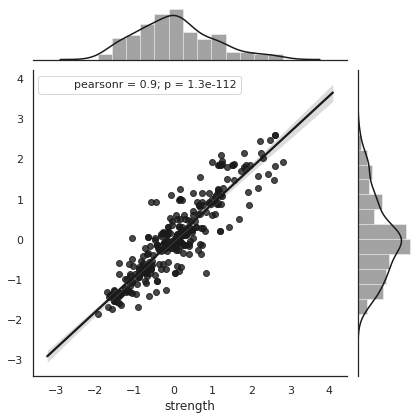

In [369]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [370]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904


## Regularising/Pruning of Decision Tree


In [371]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [372]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [373]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
cement        0.355615
slag          0.000000
ash           0.000000
water         0.106034
superplastic  0.035409
coarseagg     0.000000
fineagg       0.025055
age           0.477887


Here, we can see that ash,coarseagg and fineagg are least significant variable.


**Visualizing the Regularized Tree**


In [374]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import graphviz
import pydot
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

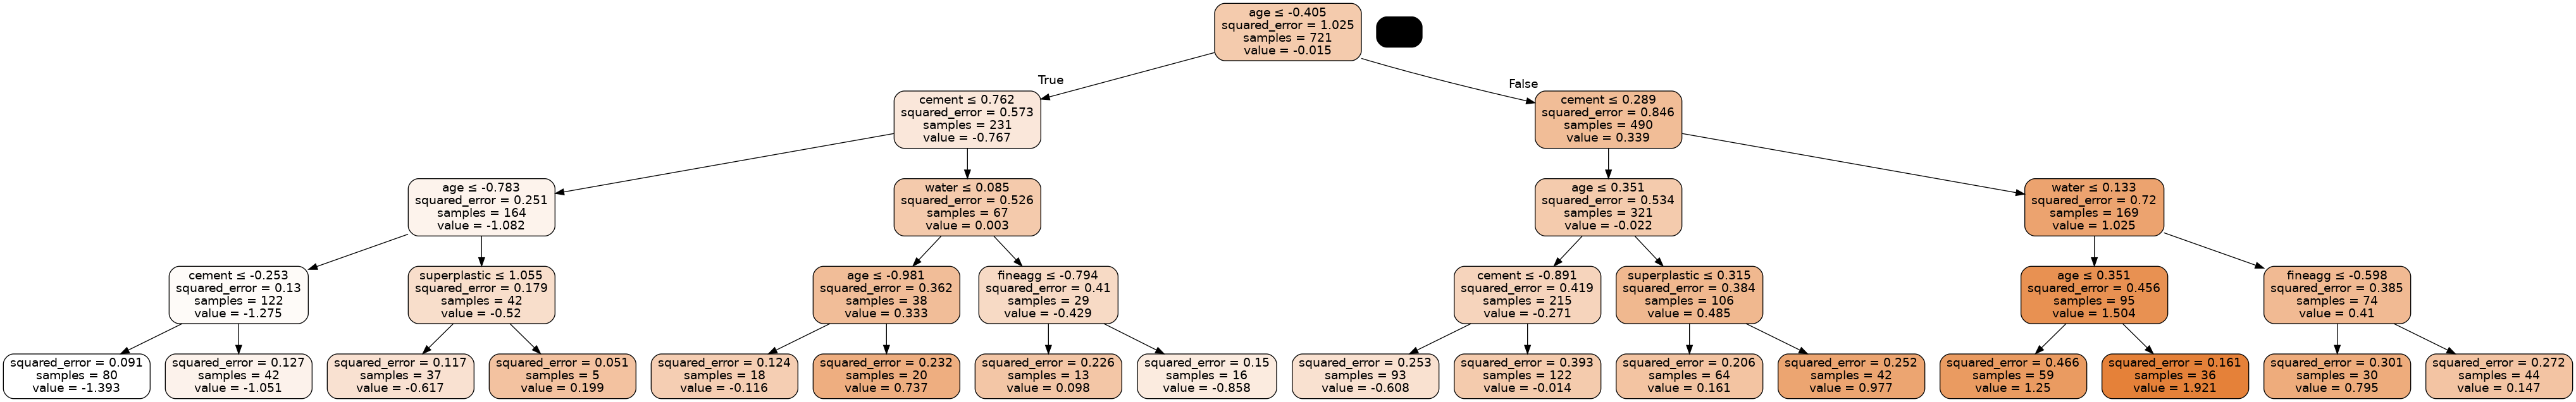

In [375]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [376]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7578225840644413
Performance on testing data using DT: 0.5568209995258158
Accuracy DT:  0.5568209995258158
MSE:  0.4166279819320927


In [377]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821


## K fold cross validation


In [378]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6785323570810374
Standard Deviation:  0.058582379617116924


In [379]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532


## Iteration2


In [380]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [381]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [382]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [383]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.756814460444701
Performance on testing data using DT: 0.5624042689390226
Accuracy DT:  0.5624042689390226
MSE:  0.4113792082633976


In [384]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404


## K Means Clustering


In [385]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.775075e+07
2,3,2.141025e+07
3,4,1.867886e+07
4,5,1.659050e+07
5,6,1.524604e+07
6,7,1.346975e+07
7,8,1.226977e+07
8,9,1.132516e+07
9,10,1.043597e+07


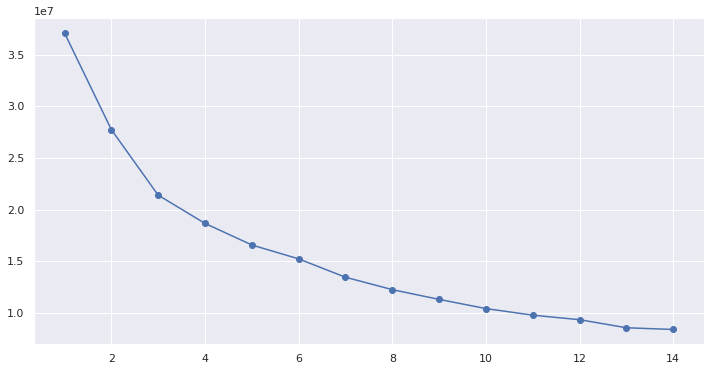

In [386]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [387]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(n_clusters=6, random_state=2354)

In [388]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)

In [389]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4291599 , -0.44054978, -0.69991583,  1.28868268, -1.0044499 ,
         0.18268458, -1.6298192 ,  0.14934337,  0.67689116],
       [ 1.01509268,  0.48811529, -0.50838886, -1.03076017,  1.03518903,
        -0.61291914,  0.18124555,  0.08216463,  1.20471909],
       [ 0.29437105, -0.83136532, -0.77079977,  0.43585367, -0.98792456,
         0.5088548 ,  0.41831131, -0.25295932, -0.68922042],
       [-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.84995576,  1.42084044, -0.84714393,  0.5969756 , -0.74107586,
        -0.04746442, -0.18749094, -0.1648694 , -0.54412831],
       [-0.60396309, -0.65588464,  1.10862567, -0.61741396,  0.49398255,
         0.62686765,  0.43267965,  0.27851339, -0.13328847]])

In [390]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.429160,-0.440550,-0.699916,1.288683,-1.004450,0.182685,-1.629819,0.149343,0.676891
1,1.015093,0.488115,-0.508389,-1.030760,1.035189,-0.612919,0.181246,0.082165,1.204719
2,0.294371,-0.831365,-0.770800,0.435854,-0.987925,0.508855,0.418311,-0.252959,-0.689220
3,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
4,-0.849956,1.420840,-0.847144,0.596976,-0.741076,-0.047464,-0.187491,-0.164869,-0.544128
5,-0.603963,-0.655885,1.108626,-0.617414,0.493983,0.626868,0.432680,0.278513,-0.133288


array([[<AxesSubplot:title={'center':'age'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'ash'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cement'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'coarseagg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'fineagg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'slag'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'strength'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'superplastic'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'water'}, xlabel='[GROUP]'>]],
      dtype=object)

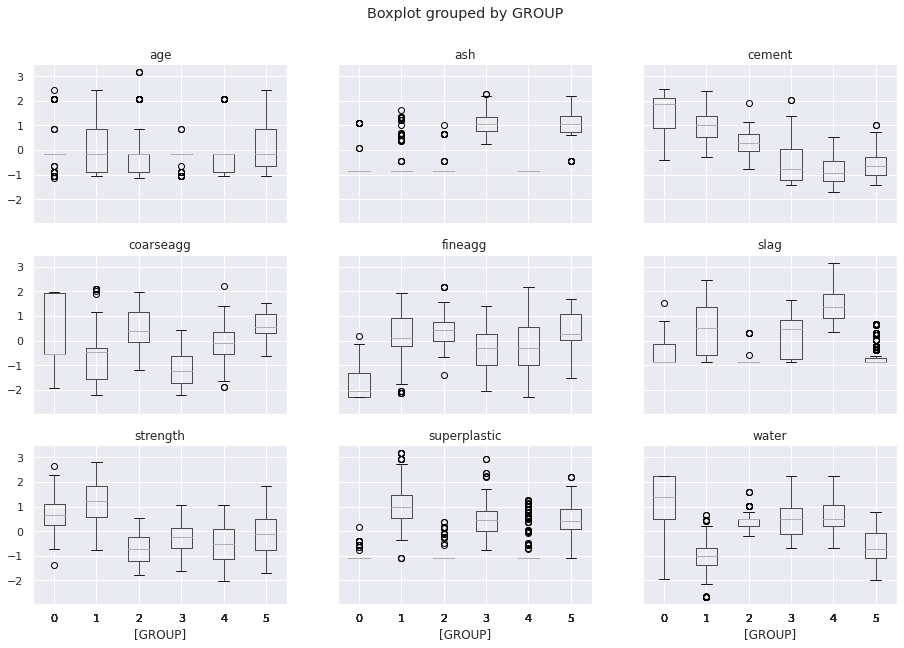

In [391]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

1. Here, None of the dimensions are good predictor of target variable.
2. For all the dimensions (variables) every cluster have a similar range of values except in one case.
3. We can see that the body of the cluster are overlapping.
4. So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [392]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## Random Forest

In [393]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [394]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9807294430789578
Performance on testing data using RFR: 0.8726598326604138
Accuracy DT:  0.8726598326604138
MSE:  0.11971117061237471


This model is also overfit.


In [395]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660


## K fold cross validation


In [396]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9115215193365576
Standard Deviation:  0.031720420716815245


In [397]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522


## Gradient Boosting Regressor


In [398]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [399]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9477368610390589
Performance on testing data using GBR: 0.8804376473978082
Accuracy DT:  0.8804376473978082
MSE:  0.11239932764505203


In [400]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438


## K fold cross validation


In [401]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8986579483827363
Standard Deviation:  0.03067991220367841


In [402]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## Ada Boosting Regressor


In [403]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [404]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8259909308800375
Performance on testing data using GBR: 0.7652269613347477
Accuracy DT:  0.7652269613347477
MSE:  0.22070769870980608


In [405]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


##  K fold cross validation


In [406]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7841682577489348
Standard Deviation:  0.035269122052681734


In [407]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## Bagging Regressor


In [408]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [409]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9755698704150829
Performance on testing data using GBR: 0.8526015286947097
Accuracy DT:  0.8526015286947097
MSE:  0.1385677741366173


In [410]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## K fold cross validation


In [411]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8984582367969853
Standard Deviation:  0.03871440048005626


In [412]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## KNN Regressor


In [413]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

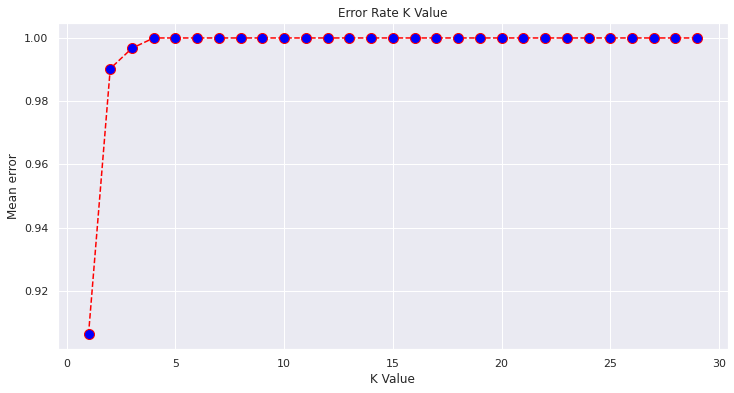

In [414]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [415]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [416]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.9072386489998584
Performance on testing data using KNNR: 0.7541705172196024
Accuracy KNNR:  0.7541705172196024
MSE:  0.23110174715097603


In [417]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## K fold cross validation


In [418]:
num_folds = 30
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8027966977700746
Standard Deviation:  0.07165708334930096


In [419]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## Support Vector Regressor


In [420]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [421]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7310131298948646
Performance on testing data using SVR: 0.655026526347604
Accuracy SVR:  0.655026526347604
MSE:  0.32430598470171396


In [422]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## K fold cross validation


In [423]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7069836070093662
Standard Deviation:  0.036325104999961666


In [424]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## Ensemeble KNN Regressor, SVR, LR


In [425]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [426]:

evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KN', KNeighborsRegressor(n_neighbors=3)),
                            ('SVM', SVR(kernel='linear'))])

In [427]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8346126058183709
Performance on testing data using ensemble: 0.7367987043025218
Accuracy ensemble:  0.7367987043025218
MSE:  0.24743280830324457


In [428]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


## K fold cross validation


In [429]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7885754595333567
Standard Deviation:  0.0314092641509002


In [430]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.753078
2,Decision Tree k fold,0.848685
3,Decision Tree2,0.799904
4,Pruned Decision Tree,0.556821
5,Pruned Decision Tree k fold,0.678532
6,Pruned Decision Tree2,0.562404
7,Random Forest Regressor,0.872660
8,Random Forest Regressor k fold,0.911522
9,Gradient Boost Regressor,0.880438
10,Gradient Boost Regressor k fold,0.898658


1. After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
2. Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

## Bootstrap Sampling


In [431]:
concrete_XY = X.join(y)


## Using Gradient Boosting Regressor


In [432]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

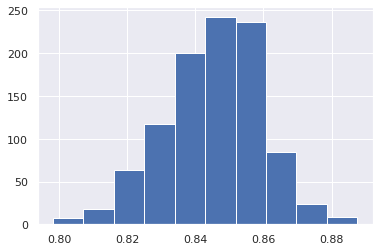

95.0 confidence interval 81.6% and 87.2%


In [433]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Using Random Forest Regressor


In [434]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

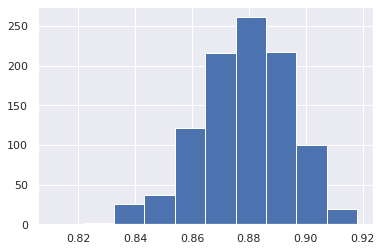

95.0 confidence interval 84.3% and 90.5%


In [435]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest classification model performance is between 84%-90.8% which is better than other classification algorithms.